<a href="https://colab.research.google.com/github/LarsBentsen/CourseDSAIStatisticalLearning/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIDS Virus infection classification

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, roc_auc_score, recall_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE

## Load the AIDS classification dataset

In [3]:
df = pd.read_csv('https://github.com/LarsBentsen/CourseDSAIStatisticalLearning/blob/main/data/AIDS_Classification.csv?raw=true')
print("number of rows: ", df.shape[0])
df.head()

number of rows:  2139


,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [4]:
# check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [5]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


In [6]:
# training and test set

np.random.seed(666)
test_indxs = np.random.choice(np.arange(df.shape[0]), size=df.shape[0] // 5, replace=False)
df_test = df.iloc[test_indxs]
df = df.drop(test_indxs)

/tmp/ipykernel_27394/2171876772.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df['infected'], bins=10, palette='viridis', kde=True)


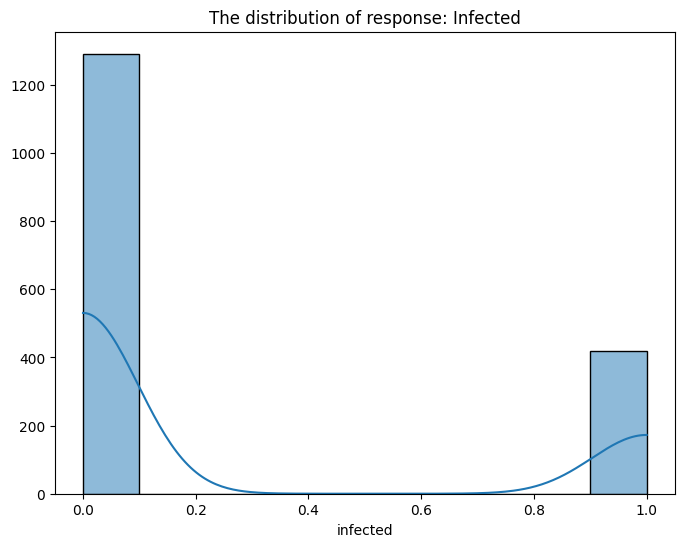

In [7]:
# look at the response: infected
plt.figure(figsize=(8,6))
sns.histplot(x=df['infected'], bins=10, palette='viridis', kde=True)
plt.title("The distribution of response: Infected")
plt.ylabel("")
plt.show()

In [8]:
# check class imbalance
df[df['infected'] == 1].shape[0] / df[df['infected'] == 0].shape[0] 

0.32507739938080493

There are many option for data pre-processing which will depend on the data and analysis. For training purposes we will skip straight to the training.

In [9]:
# training and test set

y_train = df['infected']
X_train = df.drop('infected',axis = 1)

y_test = df_test['infected']
X_test = df_test.drop('infected',axis = 1)

## Random Forest modelling

In [10]:
# Random Forest
rfc = RandomForestClassifier() # default hyperparameter values
model = rfc.fit(X_train,y_train)

Random Forest has many hyperparameters suitable for tuning. You can check them out [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier). For imbalanced binary classification, especially the parameter class_weight can be of interest, which are the weights associated with the classes. If not given, all classes are supposed to have weight one.

In [11]:
# evaluate model

y_pred = model.predict(X_test)
accuarcy = accuracy_score(y_test,y_pred)
bacc = balanced_accuracy_score(y_test,y_pred)
auc = roc_auc_score(y_test, y_pred)
sensitivity =  recall_score(y_test, y_pred)
print("Accuracy:", accuarcy)
print("Sensitivity:", sensitivity)
print("Balanced accuracy:", bacc)
print("AUC:", auc)

# confusion matrix
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test,y_pred))

Accuracy: 0.8711943793911007
Sensitivity: 0.693069306930693
Balanced accuracy: 0.8097248375144263
AUC: 0.8097248375144263
[[302  31]
 [ 24  70]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       326
           1       0.74      0.69      0.72       101

    accuracy                           0.87       427
   macro avg       0.83      0.81      0.82       427
weighted avg       0.87      0.87      0.87       427



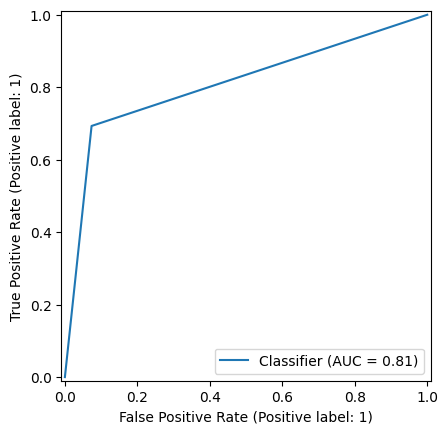

In [12]:
# plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred)

## XGBoost modelling

In [13]:
# XGBoost

clf = xgb.XGBClassifier() # default hyperparameter values
model = clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])


[0]	validation_0-logloss:0.42936
[1]	validation_0-logloss:0.37345
[2]	validation_0-logloss:0.33832
[3]	validation_0-logloss:0.31538
[4]	validation_0-logloss:0.30135
[5]	validation_0-logloss:0.29213
[6]	validation_0-logloss:0.28834
[7]	validation_0-logloss:0.28506
[8]	validation_0-logloss:0.28222
[9]	validation_0-logloss:0.28248
[10]	validation_0-logloss:0.28216
[11]	validation_0-logloss:0.28351
[12]	validation_0-logloss:0.28735
[13]	validation_0-logloss:0.29001
[14]	validation_0-logloss:0.29412
[15]	validation_0-logloss:0.29313
[16]	validation_0-logloss:0.29461
[17]	validation_0-logloss:0.29637
[18]	validation_0-logloss:0.29620
[19]	validation_0-logloss:0.29512
[20]	validation_0-logloss:0.29440
[21]	validation_0-logloss:0.29587
[22]	validation_0-logloss:0.29671
[23]	validation_0-logloss:0.29657
[24]	validation_0-logloss:0.29585
[25]	validation_0-logloss:0.29825
[26]	validation_0-logloss:0.30161
[27]	validation_0-logloss:0.30176
[28]	validation_0-logloss:0.30641
[29]	validation_0-loglos

XGBoost has many hyperparameters suitable for tuning. You can check them out [here](https://xgboost.readthedocs.io/en/stable/parameter.html). For imbalanced binary classification, especially the parameter scale_pos_weight can be of interest, which controls the balance of positive and negative weights. The default value is 1, while a typical value to consider is the sum(negative instances) / sum(positive instances).

In [14]:
# evaluate model

y_pred = model.predict(X_test)
accuarcy = accuracy_score(y_test,y_pred)
bacc = balanced_accuracy_score(y_test,y_pred)
auc = roc_auc_score(y_test, y_pred)
sensitivity =  recall_score(y_test, y_pred)
print("Accuracy:", accuarcy)
print("Sensitivity:", sensitivity)
print("Balanced accuracy:", bacc)
print("AUC:", auc)

# confusion matrix
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test,y_pred))

Accuracy: 0.8852459016393442
Sensitivity: 0.7425742574257426
Balanced accuracy: 0.8360110550932394
AUC: 0.8360110550932394
[[303  26]
 [ 23  75]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       326
           1       0.77      0.74      0.75       101

    accuracy                           0.89       427
   macro avg       0.84      0.84      0.84       427
weighted avg       0.88      0.89      0.88       427



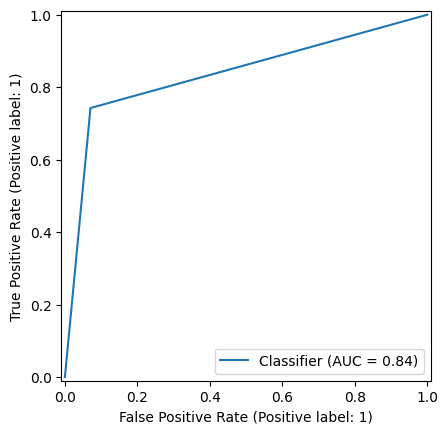

In [15]:
# plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred)

## Synthetic Minority Over-sampling Technique (SMOTE)
To tackle imbalanced datasets, read the article [here](https://arxiv.org/pdf/1106.1813).

In [16]:
# Apply SMOTE tp the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [17]:
# Random Forest
rfc = RandomForestClassifier() # default hyperparameter values
model = rfc.fit(X_res,y_res)

In [18]:
# evaluate model

y_pred = model.predict(X_test)
accuarcy = accuracy_score(y_test,y_pred)
bacc = balanced_accuracy_score(y_test,y_pred)
auc = roc_auc_score(y_test, y_pred)
sensitivity =  recall_score(y_test, y_pred)
print("Accuracy:", accuarcy)
print("Sensitivity:", sensitivity)
print("Balanced accuracy:", bacc)
print("AUC:", auc)

# confusion matrix
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test,y_pred))

Accuracy: 0.8758782201405152
Sensitivity: 0.7821782178217822
Balanced accuracy: 0.8435430966409525
AUC: 0.8435430966409525
[[295  22]
 [ 31  79]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       326
           1       0.72      0.78      0.75       101

    accuracy                           0.88       427
   macro avg       0.82      0.84      0.83       427
weighted avg       0.88      0.88      0.88       427



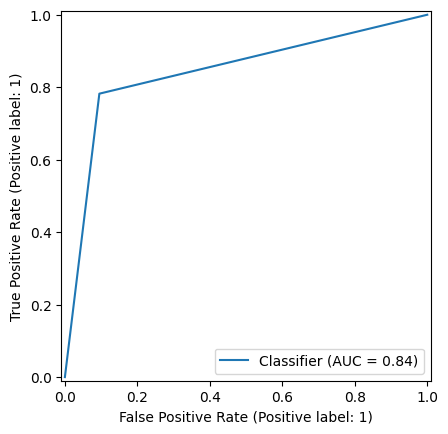

In [19]:
# plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred)

In [20]:
# XGBoost

clf = xgb.XGBClassifier() # default hyperparameter values
model = clf.fit(X_res, y_res, eval_set=[(X_test, y_test)])


[0]	validation_0-logloss:0.53078
[1]	validation_0-logloss:0.43724
[2]	validation_0-logloss:0.38047
[3]	validation_0-logloss:0.34704
[4]	validation_0-logloss:0.32685
[5]	validation_0-logloss:0.31467
[6]	validation_0-logloss:0.30331
[7]	validation_0-logloss:0.30213
[8]	validation_0-logloss:0.30241
[9]	validation_0-logloss:0.29487
[10]	validation_0-logloss:0.29103
[11]	validation_0-logloss:0.28826
[12]	validation_0-logloss:0.29097
[13]	validation_0-logloss:0.29349
[14]	validation_0-logloss:0.29432
[15]	validation_0-logloss:0.29666
[16]	validation_0-logloss:0.29721
[17]	validation_0-logloss:0.29970
[18]	validation_0-logloss:0.29870
[19]	validation_0-logloss:0.30258
[20]	validation_0-logloss:0.30813
[21]	validation_0-logloss:0.30751
[22]	validation_0-logloss:0.30782
[23]	validation_0-logloss:0.30969
[24]	validation_0-logloss:0.30847
[25]	validation_0-logloss:0.30656
[26]	validation_0-logloss:0.31339
[27]	validation_0-logloss:0.31337
[28]	validation_0-logloss:0.31612
[29]	validation_0-loglos

In [21]:
# evaluate model

y_pred = model.predict(X_test)
accuarcy = accuracy_score(y_test,y_pred)
bacc = balanced_accuracy_score(y_test,y_pred)
auc = roc_auc_score(y_test, y_pred)
sensitivity =  recall_score(y_test, y_pred)
print("Accuracy:", accuarcy)
print("Sensitivity:", sensitivity)
print("Balanced accuracy:", bacc)
print("AUC:", auc)

# confusion matrix
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test,y_pred))

Accuracy: 0.8735362997658079
Sensitivity: 0.7524752475247525
Balanced accuracy: 0.8317590961550143
AUC: 0.8317590961550142
[[297  25]
 [ 29  76]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       326
           1       0.72      0.75      0.74       101

    accuracy                           0.87       427
   macro avg       0.82      0.83      0.83       427
weighted avg       0.88      0.87      0.87       427



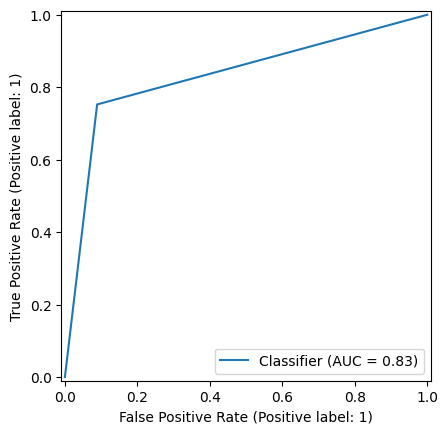

In [22]:
# plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred)